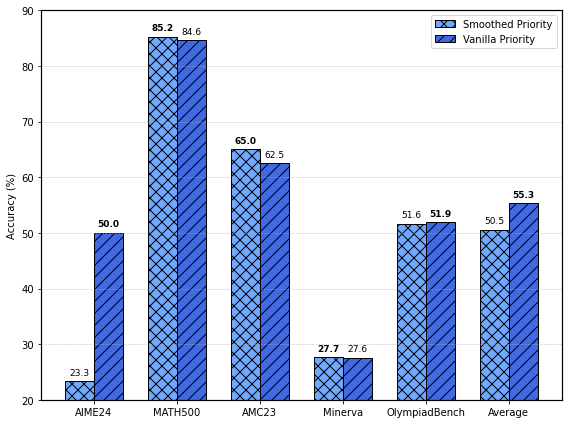

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# AAAI camera-ready config
# -----------------------------
plt.rcParams.update({
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "axes.linewidth": 1.2,
})

# -----------------------------
# Data
# -----------------------------
datasets = ["AIME24", "MATH500", "AMC23", "Minerva", "OlympiadBench", "Average"]

smoothed_priority = [23.3, 85.2, 65.0, 27.66, 51.6, 50.5]
vanilla_priority  = [50.0, 84.6, 62.5, 27.6, 51.9, 55.3]

x = np.arange(len(datasets))
width = 0.35  # 柱子稍宽一些

# -----------------------------
# Figure
# -----------------------------
fig, ax = plt.subplots(figsize=(8,6))

# color scheme
color_smo = "#6fa8ff"
color_van = "#4169e1"

# color_smo = "white"
# color_van = "white"

bars1 = ax.bar(x - width/2, smoothed_priority, width,
               label="Smoothed Priority",
               color=color_smo,
               edgecolor="black",
               hatch="xx",
               linewidth=1.0)

bars2 = ax.bar(x + width/2, vanilla_priority, width,
               label="Vanilla Priority",
               color=color_van,
               edgecolor="black",
               hatch="//",
               linewidth=1.0)

# -----------------------------
# Axes & legend
# -----------------------------
ax.set_ylabel("Accuracy (%)")
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylim(20, 90)
ax.legend(frameon=True, loc="upper right")

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)

# -----------------------------
# Value annotations (bold max value in each group)
# -----------------------------
all_values = np.vstack([smoothed_priority, vanilla_priority])

for i in range(len(datasets)):
    max_val = all_values[:, i].max()
    for j, val in enumerate(all_values[:, i]):
        # 调整文本位置
        offset = -width/2 if j == 0 else width/2
        ax.text(x[i] + offset,
                val + 0.8,
                f"{val:.1f}",
                ha="center",
                va="bottom",
                fontsize=9,
                fontweight="bold" if val == max_val else "normal")

plt.tight_layout()
plt.savefig("priority_comp.pdf")
plt.show()


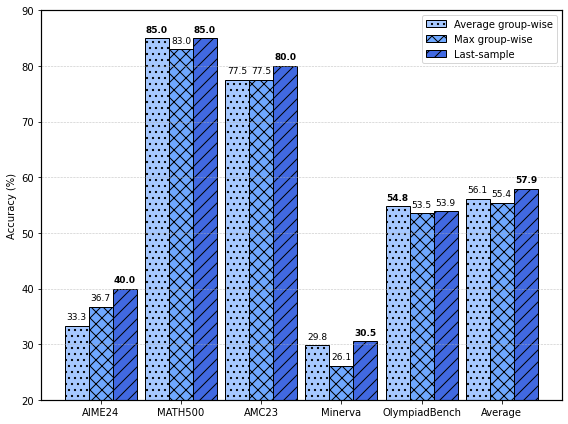

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# AAAI camera-ready config
# -----------------------------
plt.rcParams.update({
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "axes.linewidth": 1.2,
})

# -----------------------------
# Data
# -----------------------------
datasets = ["AIME24", "MATH500", "AMC23", "Minerva", "OlympiadBench", "Average"]

avg_group   = [33.3, 85.0, 77.5, 29.8, 54.8, 56.1]
max_group   = [36.7, 83.0, 77.5, 26.1, 53.5, 55.4]
last_sample = [40.0, 85.0, 80.0, 30.5, 53.9, 57.9]

x = np.arange(len(datasets))
width = 0.30   # ★ bar 更宽

# -----------------------------
# Figure (larger for readability)
# -----------------------------
fig, ax = plt.subplots(figsize=(8,6))

# Original blue color scheme
color_avg  = "#a6c8ff"
color_max  = "#6fa8ff"
color_last = "#4169e1"


bars1 = ax.bar(x - width, avg_group, width,
               label="Average group-wise",
               color=color_avg,
               edgecolor="black",
               hatch="..",
               linewidth=1.0)

bars2 = ax.bar(x, max_group, width,
               label="Max group-wise",
               color=color_max,
               edgecolor="black",
                hatch="xx",
               linewidth=1.0)

bars3 = ax.bar(x + width, last_sample, width,
               label="Last-sample",
               color=color_last,
               edgecolor="black",
                hatch="//",
               linewidth=1.0)

# -----------------------------
# Axes & legend
# -----------------------------
ax.set_ylabel("Accuracy (%)")
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylim(20, 90)
ax.legend(frameon=True, loc="upper right")

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)

# -----------------------------
# Value annotations
# (bold the max value in each group)
# -----------------------------
all_values = np.vstack([avg_group, max_group, last_sample])

for i in range(len(datasets)):
    max_val = all_values[:, i].max()

    for j, val in enumerate(all_values[:, i]):
        ax.text(x[i] + (j - 1) * width,
                val + 0.8,
                f"{val:.1f}",
                ha="center",
                va="bottom",
                fontsize=9,
                fontweight="bold" if val == max_val else "normal")

plt.tight_layout()
plt.savefig("per3.pdf")
plt.show()


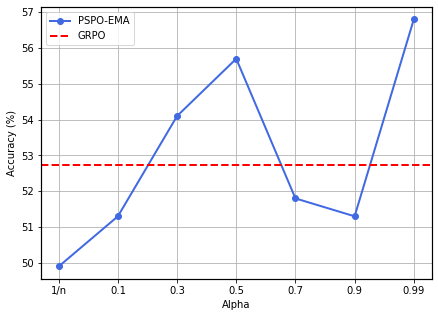

In [25]:
import matplotlib.pyplot as plt

# 全局字体设为 10pt
plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

alphas = ["1/n", "0.1", "0.3", "0.5", "0.7", "0.9", "0.99"]
all_alpha_avg = [49.9, 51.3, 54.1, 55.7, 51.8, 51.3, 56.8]

plt.figure(figsize=(7,5))

# 主折线
plt.plot(alphas, all_alpha_avg,color="#4169e1", marker='o', linewidth=2, label="PSPO-EMA")

# # 在折线上显示数值
# for x, y in zip(alphas, all_alpha_avg):
#     plt.text(x, y + 0.3, f"{y:.1f}", ha='center', va='bottom', fontsize=9)
    

# 虚线水平线 GRPO
plt.axhline(y=52.74, color="red", linewidth=2, linestyle="--", label="GRPO")


# plt.text(alphas[-1], 52.74 + 0.3, "52.74", color="red", ha='right', va='bottom', fontsize=9)


plt.xlabel("Alpha")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.savefig("all_alpha_extracted.pdf", bbox_inches="tight")
plt.show()
